<a href="https://colab.research.google.com/github/FabianGutierrez2170552/Data_Visualization/blob/main/Pr%C3%A1ctica_Descriptiva_FMGUTIERREZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Caso práctico Descriptivo - Banco**

En este caso práctico, asumiremos que trabajamos como científico de datos en un banco y vamos a explorar los resultados de una campaña de marketing que ofrece un producto a deposito fijo a los clientes actuales.


La variable objetivo es predecir si el cliente es bueno o malo ("1", "0").

**Las variables independientes**:

1 - genero

* Femenino
* Masculino 

2 - Rangos de edad 

* Menor a 25 años 

* Entre 25 y 35 años
* Entre 36 y 45 años 
* Entre 46 y 56 años
* Mayor a 56 años 

3 - productos

* Uno producto
* Entre 2 y 3 productos 
* Entre 4 y 6 productos

4 - Estado
* Soltero
* Casado
* Divorciado 
* Viudo 

5 - Edad 

6 - hijos
* Si
* No


**PASO #2: Importar Librerias y conjuntos de datos**

In [ ]:
#Manipulacion de dataframes
import pandas as pd
#Analisis numerico
import numpy as np
#Visualizacion de datos
import seaborn as sns
import matplotlib.pyplot as plt

**Paso #2.1: Importar el conjunto de datos**

In [ ]:
# incluir el enlace completo al archivo csv 
banco_df = pd.read_csv("/content/sample_data/Data_CLIENTES_F.csv", encoding="latin1", sep=";")

In [ ]:
banco_df.head()

,id,genero,Rangosedad,Escolaridad,Score,productos,Estado,Edad,hijos
0,187,Femenino,Entre 25 y 35 años,Universitario,1,Un producto,Soltero,26,si
1,192,Masculino,Menor a 25 años,Técnico,0,Un producto,Soltero,22,si
2,133,Masculino,Entre 36 y 45 años,Posgrado,1,Un producto,Casado,36,si
3,182,Masculino,Entre 46 y 56 años,Posgrado,1,Entre 2 y 3 productos,Viudo,47,si
4,213,Masculino,Mayor a 56 años,Posgrado,1,Entre 2 y 3 productos,Viudo,60,si


In [ ]:
banco_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            49 non-null     int64 
 1   genero        49 non-null     object
 2   Rangosedad    49 non-null     object
 3   Escolaridad   49 non-null     object
 4   Score         49 non-null     int64 
 5   productos     49 non-null     object
 6   Estado        49 non-null     object
 7   Edad          49 non-null     int64 
 8   hijos         49 non-null     object
dtypes: int64(3), object(6)
memory usage: 3.6+ KB


In [ ]:
banco_df.describe()

,id,Score,Edad
count,49.000000,49.000000,49.000000
mean,180.408163,0.530612,39.020408
std,35.733923,0.504234,14.299606
min,124.000000,0.000000,18.000000
25%,152.000000,0.000000,28.000000
50%,178.000000,1.000000,39.000000
75%,213.000000,1.000000,47.000000
max,250.000000,1.000000,77.000000


**Paso #3: Explorar el conjunto de datos**

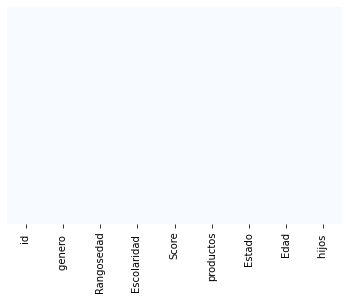

In [ ]:
# Revisar si existen datos faltantes
sns.heatmap(banco_df.isnull(), yticklabels=False, cbar = False, cmap = "Blues")

In [ ]:
#Otra forma de revisar datos missing o faltantes
banco_df.isnull().sum()

id              0
genero          0
Rangosedad      0
Escolaridad     0
Score           0
productos       0
Estado          0
Edad            0
hijos           0
dtype: int64

In [ ]:
banco_df["Score"].value_counts()

1    26
0    23
Name: Score, dtype: int64

In [ ]:
#Para variables númericas podríamos analizar el promedio para los que adquieren o no el producto
banco_df.groupby('Score').mean()

,id,Edad
Score,,
0,181.565217,33.608696
1,179.384615,43.807692


In [ ]:
#Se puede analizar por educación 
banco_df.groupby("productos").mean()

,id,Score,Edad
productos,,,
Entre 2 y 3 productos,178.714286,0.857143,42.428571
Entre 4 y 6 productos,181.535714,0.392857,40.142857
Un producto,179.000000,0.642857,35.071429


Text(0, 0.5, 'Proporción de clientes')

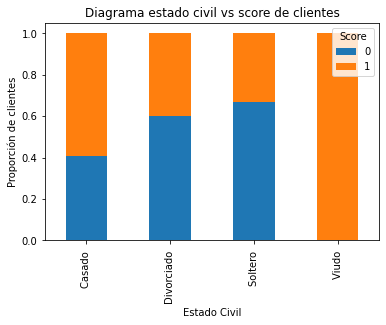

In [ ]:
#Diagrama de barras apilado
table = pd.crosstab(banco_df.Estado, banco_df.Score)
#Divide el resultado en columnas axis=0 y calcula la proporción entre cero y 1 (%), staked apila
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Diagrama estado civil vs score de clientes")
plt.xlabel("Estado Civil")
plt.ylabel("Proporción de clientes")

Text(0, 0.5, 'Proporción de clientes')

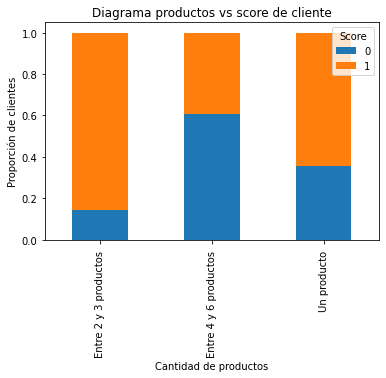

In [ ]:
#Diagrama de barras apilado
table = pd.crosstab(banco_df.productos, banco_df.Score)
#Divide el resultado en columnas axis=0 y calcula la proporción entre cero y 1 (%), staked apila
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Diagrama productos vs score de cliente")
plt.xlabel("Cantidad de productos")
plt.ylabel("Proporción de clientes")

Text(0, 0.5, 'Proporción de clientes')

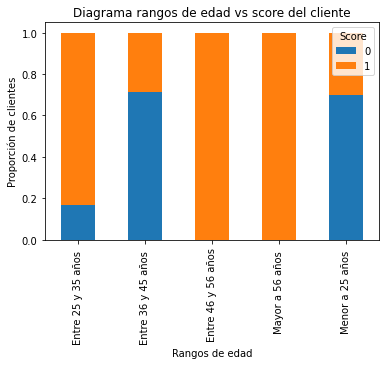

In [ ]:
#Diagrama de barras apilado
table = pd.crosstab(banco_df.Rangosedad, banco_df.Score)
#Divide el resultado en columnas axis=0 y calcula la proporción entre cero y 1 (%), staked apila
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Diagrama rangos de edad vs score del cliente")
plt.xlabel("Rangos de edad")
plt.ylabel("Proporción de clientes")